<img src="logo.png" alt="UMU logo" height="10px" width="200px"  style="display:block; margin-left:auto; margin-right:auto;">

# UMU Data Analysis and Visualization

<h4> Hitanghu Moses Mulongo - 2024-M132-20791 </h4>
<p> Assignment 3 </p>

<h2>Assignment 3 Part A  - Wine Quality</h2>

In [166]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [168]:
# Load wine quality Dataset
wine_df = pd.read_csv("winequality-white.csv", sep=";", header=0)
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h2> Checking for Missing or Inconsistent Values </h2>

In [170]:

# Check for missing values
missing_values = wine_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for inconsistent values (e.g., negative values where they shouldn't exist)
chemical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                     'density', 'pH', 'sulphates', 'alcohol']

# Display summary statistics to identify potential inconsistencies
summary = wine_df[chemical_features].describe()
print("\nSummary Statistics:")
print(summary)

# Check for values outside expected ranges (example for pH which should be between 2.5 and 4.5 for wine)

inconsistent_pH = wine_df[(wine_df['pH'] < 2.5) | (wine_df['pH'] > 4.5)]
print(f"\nRows with potentially inconsistent pH values: {len(inconsistent_pH)}")

# Check if total sulfur dioxide is less than free sulfur dioxide (which would be inconsistent)
inconsistent_sulfur = wine_df[wine_df['total sulfur dioxide'] < wine_df['free sulfur dioxide']]
print(f"Rows where total SO2 < free SO2: {len(inconsistent_sulfur)}")


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000  

<h2> Normalizing Some Features </h2>

In [195]:
# Z-score Normalization
z_scaler = StandardScaler()
wine_df['alcohol_normalized_zscore'] = z_scaler.fit_transform(wine_df[['alcohol']])
wine_df['density_normalized_zscore'] = z_scaler.fit_transform(wine_df[['density']])
wine_df['pH_normalized_zscore'] = z_scaler.fit_transform(wine_df[['pH']])

# Display the first few rows with normalized features
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_normalized_zscore,density_normalized_zscore,pH_normalized_zscore,alcohol_capped,density_capped,pH_capped,acidity_ratio,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,-1.393152,2.331512,-1.246921,8.8,1.00100,3.00,25.925926,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,-0.824276,-0.009154,0.740029,9.5,0.99400,3.30,21.000000,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,-0.336667,0.358665,0.475102,10.1,0.99510,3.26,28.928571,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,-0.499203,0.525855,0.011480,9.9,0.99560,3.19,31.304348,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,-0.499203,0.525855,0.011480,9.9,0.99560,3.19,31.304348,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.557282,-0.965483,0.541334,11.2,0.99114,3.27,29.523810,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,-0.743008,0.291789,-0.253446,9.6,0.99490,3.15,20.625000,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,-0.905544,-0.497350,-1.313153,9.4,0.99254,2.99,27.083333,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.857572,-1.784717,1.004955,12.8,0.98869,3.34,18.965517,high


<h2> Detecting and Handling Outliers </h2>

In [175]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for key features using only IQR method
for feature in ['alcohol', 'density', 'pH']:
    # IQR method
    outliers_iqr, lower, upper = detect_outliers_iqr(wine_df, feature)
    print(f"\nOutliers in {feature} using IQR method: {len(outliers_iqr)}")
    print(f"Lower bound: {lower:.4f}, Upper bound: {upper:.4f}")
    
    # Handle outliers by capping with IQR bounds
    wine_df[f'{feature}_capped'] = wine_df[feature].copy()
    wine_df.loc[wine_df[feature] < lower, f'{feature}_capped'] = lower
    wine_df.loc[wine_df[feature] > upper, f'{feature}_capped'] = upper


Outliers in alcohol using IQR method: 0
Lower bound: 6.6500, Upper bound: 14.2500

Outliers in density using IQR method: 5
Lower bound: 0.9852, Upper bound: 1.0027

Outliers in pH using IQR method: 75
Lower bound: 2.8050, Upper bound: 3.5650


<h4> Detecting outliers again to comfirm </h4>

In [177]:
for feature in ['alcohol_capped', 'density_capped', 'pH_capped']:
    # IQR method
    outliers_iqr, lower, upper = detect_outliers_iqr(wine_df, feature)
    print(f"\nOutliers in {feature} using IQR method: {len(outliers_iqr)}")
    print(f"Lower bound: {lower:.4f}, Upper bound: {upper:.4f}")


Outliers in alcohol_capped using IQR method: 0
Lower bound: 6.6500, Upper bound: 14.2500

Outliers in density_capped using IQR method: 0
Lower bound: 0.9852, Upper bound: 1.0027

Outliers in pH_capped using IQR method: 0
Lower bound: 2.8050, Upper bound: 3.5650


<h2> Creating a New Feature: Acidity Ratio </h2>

In [181]:
# Create acidity ratio feature
wine_df['acidity_ratio'] = wine_df['fixed acidity'] / wine_df['volatile acidity']


<h2> Discretizing Quality into low,medium and high classes </h2>

In [184]:
# Determine the quality distribution
print("\nQuality Distribution:")
print(wine_df['quality'].value_counts().sort_index())

# Define quality classes
def categorize_quality(quality):
    if quality <= 4:
        return 'low'
    elif quality <= 6:
        return 'medium'
    else:
        return 'high'

# Create new categorical feature
wine_df['quality_category'] = wine_df['quality'].apply(categorize_quality)

# Display the distribution of the new categorical feature
print("\nQuality Category Distribution:")
print(wine_df['quality_category'].value_counts())




Quality Distribution:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Quality Category Distribution:
quality_category
medium    3655
high      1060
low        183
Name: count, dtype: int64


<h2> Assignment 3 Part B - Covid 19 </h2>
<p> Covid 19 data set cleaning and feature engineering</p>

In [78]:
# Load covid 19 Dataset
covid_19_df_timeseries = pd.read_csv("time-series-19-covid-combined.csv")
covid_19_df_timeseries.head(5)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [82]:
# Load covid 19 world Dataset
covid_19_df_global = pd.read_csv("WHO-COVID-19-global-data.csv")
new_cases = covid_19_df_global[['Date_reported','Country', 'New_cases']]
new_cases.head(5)

,Date_reported,Country,New_cases
0,2020-01-05,Armenia,NaN
1,2020-01-12,Armenia,NaN
2,2020-01-19,Armenia,NaN
3,2020-01-26,Armenia,NaN
4,2020-02-02,Armenia,NaN


In [86]:
#merge new cases df to the time series df

covid_19_df = pd.merge(
    covid_19_df_timeseries, new_cases, left_on=["Date", "Country/Region"],
    right_on=["Date_reported", "Country"], how="inner")
covid_19_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Date_reported,Country,New_cases
0,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26,Afghanistan,NaN
1,2020-02-02,Afghanistan,NaN,0,0.0,0,2020-02-02,Afghanistan,NaN
2,2020-02-09,Afghanistan,NaN,0,0.0,0,2020-02-09,Afghanistan,NaN
3,2020-02-16,Afghanistan,NaN,0,0.0,0,2020-02-16,Afghanistan,NaN
4,2020-02-23,Afghanistan,NaN,0,0.0,0,2020-02-23,Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...
27719,2022-03-13,Zimbabwe,NaN,242515,0.0,5414,2022-03-13,Zimbabwe,3338.0
27720,2022-03-20,Zimbabwe,NaN,244452,0.0,5426,2022-03-20,Zimbabwe,2095.0
27721,2022-03-27,Zimbabwe,NaN,245820,0.0,5438,2022-03-27,Zimbabwe,1315.0
27722,2022-04-03,Zimbabwe,NaN,246525,0.0,5446,2022-04-03,Zimbabwe,714.0


<h2> Handle missing values </h2>

In [187]:
covid_19_df.isnull().sum()

Date                        0
Country/Region              0
Province/State          19372
Confirmed                   0
Recovered                   0
Deaths                      0
Date_reported               0
Country                     0
New_cases                1742
Active_Cases                0
new_cases_normalized     1742
new_cases_category       1742
risk_category               0
dtype: int64

In [207]:
#Replacing values in New cases, new_cases_normalized by mean
covid_19_df['New_cases'] = covid_19_df['New_cases'].fillna(covid_19_df['New_cases'].mean())
covid_19_df['new_cases_normalized'] = covid_19_df['new_cases_normalized'].fillna(covid_19_df['new_cases_normalized'].mean())

#Replace all null values country and new_cases_category
for col in ["Province/State", "new_cases_category"]:
    if isinstance(covid_19_df[col].dtype, pd.CategoricalDtype):
        covid_19_df[col] = covid_19_df[col].cat.add_categories("Unknown")
    covid_19_df[col] = covid_19_df[col].fillna("Unknown")
#display null values
covid_19_df.isnull().sum()



Date                    0
Country/Region          0
Province/State          0
Confirmed               0
Recovered               0
Deaths                  0
Date_reported           0
Country                 0
New_cases               0
Active_Cases            0
new_cases_normalized    0
new_cases_category      0
risk_category           0
dtype: int64

<h2> Create new active cases feature </h2>

In [90]:
# Create new feature: active_cases
covid_19_df['Active_Cases'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Date_reported,Country,New_cases,Active_Cases
0,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26,Afghanistan,NaN,0.0
1,2020-02-02,Afghanistan,NaN,0,0.0,0,2020-02-02,Afghanistan,NaN,0.0
2,2020-02-09,Afghanistan,NaN,0,0.0,0,2020-02-09,Afghanistan,NaN,0.0
3,2020-02-16,Afghanistan,NaN,0,0.0,0,2020-02-16,Afghanistan,NaN,0.0
4,2020-02-23,Afghanistan,NaN,0,0.0,0,2020-02-23,Afghanistan,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
27719,2022-03-13,Zimbabwe,NaN,242515,0.0,5414,2022-03-13,Zimbabwe,3338.0,237101.0
27720,2022-03-20,Zimbabwe,NaN,244452,0.0,5426,2022-03-20,Zimbabwe,2095.0,239026.0
27721,2022-03-27,Zimbabwe,NaN,245820,0.0,5438,2022-03-27,Zimbabwe,1315.0,240382.0
27722,2022-04-03,Zimbabwe,NaN,246525,0.0,5446,2022-04-03,Zimbabwe,714.0,241079.0


<h2> Normalize daily new cases </h2>

In [94]:
# Normalize daily new cases using standard scalar
scaler = MinMaxScaler()
covid_19_df['new_cases_normalized'] = scaler.fit_transform(covid_19_df[['New_cases']])



<h2> Aggregating cases by country </h2>

In [98]:
# Aggregate cases by country
country_agg = covid_19_df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    
    'New_cases': 'sum'
}).reset_index()

# Display the aggregated data
country_agg.head()

,Country/Region,Confirmed,Deaths,Recovered,New_cases
0,Afghanistan,9353508,407243,2611485.0,178090.0
1,Albania,11657215,187137,3234777.0,274108.0
2,Algeria,13412883,375840,3666914.0,265720.0
3,Andorra,1349387,10771,439945.0,40328.0
4,Angola,3730568,85632,840665.0,99194.0


<h2> Plot normalized time-series function </h2>

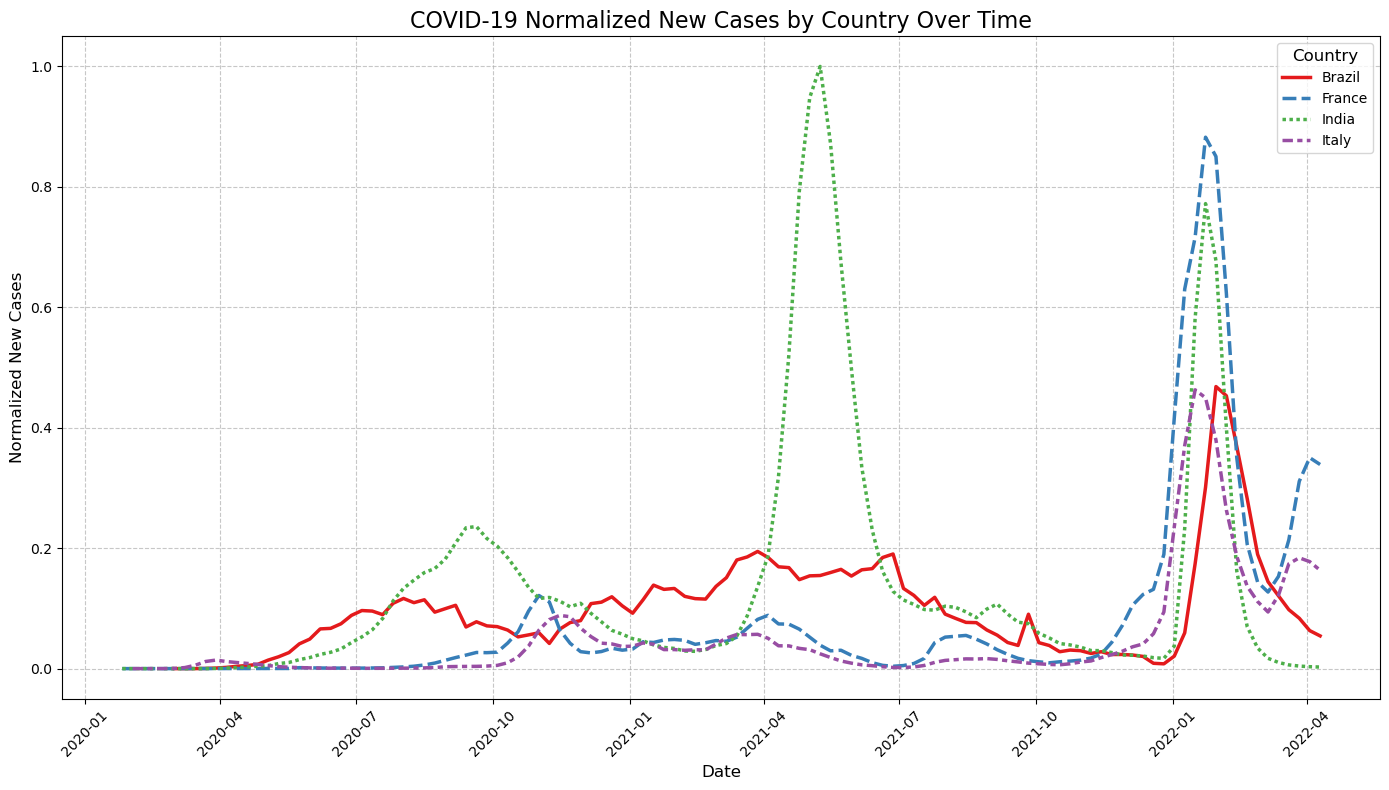

In [135]:

# Select some countries for comparison
selected_countries = ['Italy', 'India', 'Brazil', 'France']

# Filter the dataframe for selected countries
filtered_df = covid_19_df[covid_19_df['Country/Region'].isin(selected_countries)]

# Convert Date to datetime if it's not already
filtered_df.loc[:,'Date'] = pd.to_datetime(filtered_df['Date'])

# Create a pivot table with countries as columns and dates as index
pivot_df = filtered_df.pivot_table(
    index='Date', 
    columns='Country/Region', 
    values='new_cases_normalized',
    aggfunc='mean'  # In case there are multiple entries per day per country
)

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_df, palette='Set1', linewidth=2.5)

# Add labels and title
plt.title('COVID-19 Normalized New Cases by Country Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Country', title_fontsize=12, fontsize=10)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

<h2> Discretize daily New Cases </h2>

In [142]:
# Discretize daily_new_cases into 3 intervals
q_low, q_medium = covid_19_df['New_cases'].quantile([0.33, 0.66])

# Create new categorical column
covid_19_df['new_cases_category'] = pd.cut(
    covid_19_df['New_cases'],
    bins=[float('-inf'), q_low, q_medium, float('inf')],
    labels=['low', 'medium', 'high']
)

# Check distribution
covid_19_df['new_cases_category'].value_counts()

new_cases_category
high      8834
low       8637
medium    8511
Name: count, dtype: int64

<h2>  Discretize active  Cases for risk assessment </h2>

In [150]:
# Discretize active_cases into intervals for risk assessment

q_active_low, q_active_medium = covid_19_df['Active_Cases'].quantile([0.33, 0.66])

covid_19_df['risk_category'] = pd.cut(
    covid_19_df['Active_Cases'],
    bins=[float('-inf'), q_active_low, q_active_medium, float('inf')],
    labels=['low risk', 'medium risk', 'high risk']
)

# Check distribution
covid_19_df['risk_category'].value_counts()

risk_category
high risk      9426
low risk       9155
medium risk    9143
Name: count, dtype: int64

<h4> END OF ASSIGNMENT </h4>